In [2]:
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt

In [3]:
bank = ['02-09 leicester RM.png',
'04-01 bournemouth LL.png',
'05-02 crystal LL.png',
'05-09 arsenal LM.png',
'07-01 everton LL.png',
'09-02 burnley RR.png',
'10-10 everton RL.png',
'11-11 villa LL.png',
'14-01 city LL.png',
'14-11 fullham RL.png',
'20-04 liverpool RM.png',
'20-10 spurs LM.png',
'22-12 burnley LR.png',
'23-01 arsenal RL.png',
'23-08 liverpool LM.png',
'23-10 chelsea RM.png',
'25-01 Nottingham RL.png',
'28-01 reading LL.png',
'28-12 forest LL.png']

coordinate = []
s1= 316
s2 = 800

In [4]:
def findcenter(coordinate,cnts):
    global s1
    global s2
    xcnts = []

    for cnt in cnts:
        if 100 < cv2.contourArea(cnt) < s2:
            #xcnts.append(cnt)
            ((x, y), r) = cv2.minEnclosingCircle(cnt)
            coordinate.append([round(x)/7.15,round(y)/7.35])
    return coordinate
        #cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 1)
# print("Dots number: {}".format(len(xcnts)))
# print(coordinate)

In [5]:
for file in bank:
    image = cv2.imread(file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshed = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    findcenter(coordinate, cnts)

In [6]:
coordinate = np.array(coordinate)
coordinate = pd.DataFrame(coordinate, columns = ['x','y'])


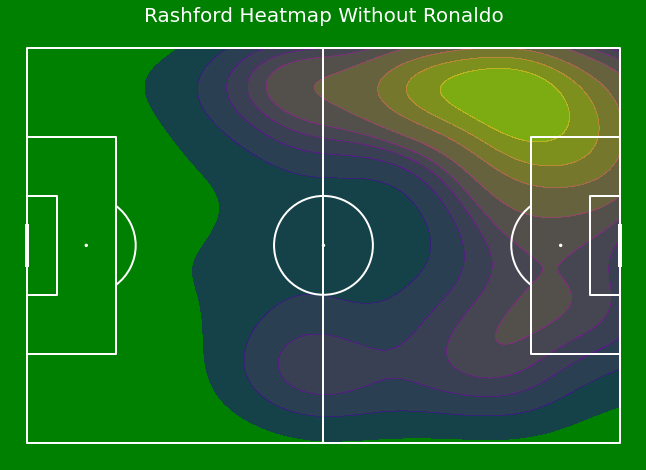

In [118]:
fig, ax = plt.subplots(figsize = (13.5,8))

fig.set_facecolor('green')
pitch = Pitch(pitch_type = 'statsbomb', pitch_color = 'green', line_color = 'white',line_zorder=2)
# #fig, ax= pitch.draw(figsize = (13.5,8))
# # pitch.kdeplot(coordinate['x'], coordinate['y'], cmap='magma', fill=True, levels=100, ax=ax)
pitch.kdeplot(
    x=coordinate['x'],
    y=coordinate['y'],
    shade = True,
    shade_lowest=False,
    alpha=.5,
    n_levels=10,
    cmap = 'plasma',
    ax = ax

)

ax.set_title('Rashford Heatmap Without Ronaldo',c = 'white',size = 20)
pitch.draw(ax = ax)
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
                       
plt.savefig('Rashford heat map No R.png')
#kde = sns.kdeplot(coordinate['x'], coordinate['y'],ax = ax, fill=True, alpha = 0.5, thresh=0, levels=100,  cmap = 'magma')

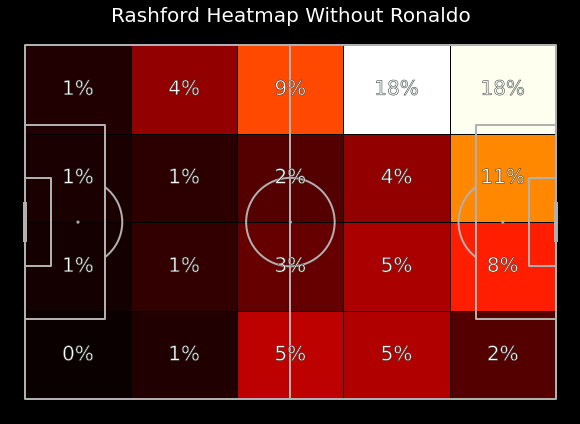

In [117]:
import matplotlib.patheffects as path_effects
pitch = Pitch(line_zorder=2, pitch_color='black')
fig, ax = pitch.draw(figsize = (10,6))
fig.set_facecolor('black')
ax.set_title('Rashford Heatmap Without Ronaldo',c = 'white',size = 20)
stats = pitch.bin_statistic(coordinate['x'],coordinate['y'], statistic='count', normalize=True)
pitch.heatmap(stats, edgecolors='black', cmap='hot', ax=ax)
stats['statistic'] = stats['statistic'] / stats['statistic'].sum()

path_eff = [path_effects.Stroke(linewidth=0.5, foreground='#22312b')]
text = pitch.label_heatmap(stats, color='white', ax=ax, fontsize=20, ha='center',va='center',str_format='{:.0%}', path_effects=path_eff)
fig.savefig('Rashford heat map No R_P.png')

In [73]:
image = cv2.imread('07-01 everton LL_MM.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshed = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [143]:
xcnts = []
s1 = 150
for cnt in cnts:
#     print(cv2.contourArea(cnt))
    if s1 < cv2.contourArea(cnt) < s2:
        
        xcnts.append(cnt)
        ((x, y), r) = cv2.minEnclosingCircle(cnt)
        coordinate.append([round(x)/7.15,round(y)/7.35])
        cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 1)
print("Dots number: {}".format(len(xcnts)))

C:\Users\75109\AppData\Local\Temp\ipykernel_27892\788415694.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinate.append([round(x)/7.15,round(y)/7.35])


Dots number: 53


In [144]:
convexityDefects = []
xcnts = []
for contour in xcnts:
    if cv2.contourArea(contour) >200 :
        convexHull = cv2.convexHull(contour, returnPoints = False)
        #print(convexHull)
        convexityDefects.append(cv2.convexityDefects(contour, convexHull))
        convexHull = cv2.convexHull(contour)
        cv2.drawContours(image, [convexHull], -1, (36, 255, 12), 2)


In [145]:
cv2.imshow('image', image)
cv2.waitKey()

-1

In [27]:
print(convexityDefects)

[]


In [105]:
image = cv2.imread('07-01 everton LL_MM.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshed = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

In [110]:
cnts = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    print(area)
    if area < 500:
        cv2.drawContours(threshed,[c],-1, (36, 255, 12), 2)

533049.0


In [107]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
erosion = cv2.erode(threshed, kernel, iterations=3)

In [108]:
cnts = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    print(area)
    if area > 20 and area < 50 :
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 2)

532144.5


In [109]:
#cv2.imshow('thresh', threshed)
cv2.imshow('image', image)
cv2.waitKey()

-1

In [76]:
from PIL import Image

In [124]:
new = Image.open('07-01 everton LL.png')
width, height = new.size
modified = Image.new('RGBA',(width,height),'white')
pixels = modified.load()
for y in range(height):
    for x in range(width):
        r1,g1,b1,a1 = new.getpixel((x,y))
#         print(r1,g1,b1,a1)
        if r1 != 235 and g1 != 91 and b1 != 20:
            r1 = 0
            g1 = 0 
            b1 = 0 
            a1 = 0
        pixels[x, y] = (r1, g1, b1, a1)


In [125]:
modified.save('07-01 everton LL_MM.png','PNG') 

In [141]:
img = cv2.imread('07-01 everton LL_MM.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 0.1, param1=50, param2=30, minRadius=0, maxRadius=0)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (36, 255, 12), 2)
        
cv2.imshow('Detected Circles', img)
cv2.waitKey(0)

-1

In [171]:
img1 = Image.open('Rashford heat map with R.png')
img2 = Image.open('Rashford heat map No R.png')
img3 = Image.blend(img1, img2, 0.5)
img3.show()

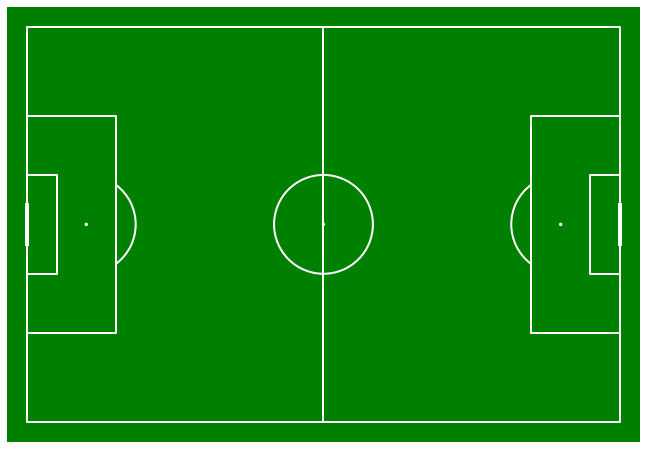

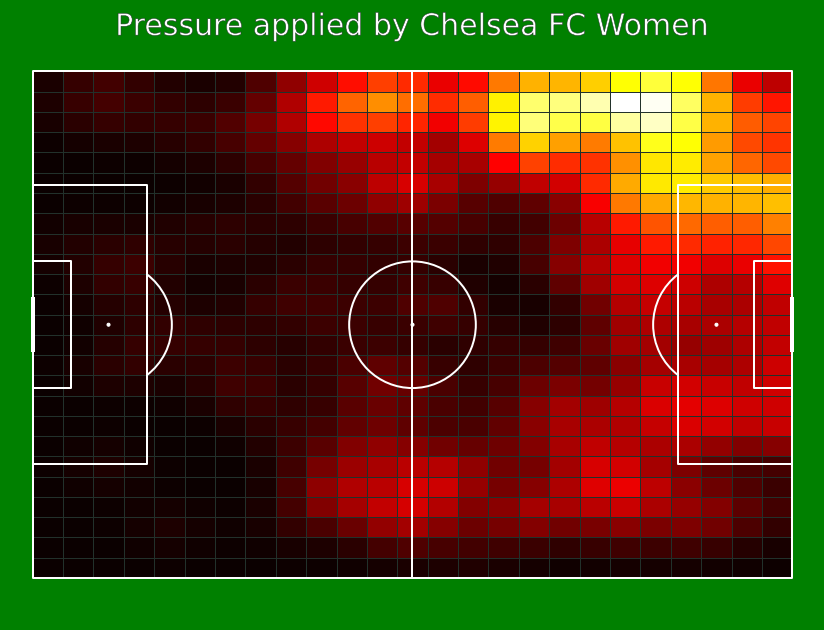

In [88]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen


fig, ax = plt.subplots(figsize = (13.5,8))
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#22312b')
fig.set_facecolor('green')
pitch = Pitch(pitch_type = 'statsbomb', pitch_color = 'green', line_color = 'white',line_zorder=2)
# plot heatmap
bin_statistic = pitch.bin_statistic(coordinate['x'], coordinate['y'], statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

# add cbar
# ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
# cbar = plt.colorbar(pcm, cax=ax_cbar)
# cbar.outline.set_edgecolor('#efefef')
# cbar.ax.yaxis.set_tick_params(color='#efefef')
# plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
# for label in cbar.ax.get_yticklabels():
#     label.set_fontproperties(robotto_regular.prop)
#     label.set_fontsize(15)
pitch.draw(ax = ax)
# endnote and title
# axs['endnote'].text(1, 0.5, '@your_twitter_handle', va='center', ha='right', fontsize=15,
#                     fontproperties=robotto_regular.prop, color='#dee6ea')
ax_title = axs['title'].text(0.5, 0.5, "Pressure applied by Chelsea FC Women", color='white',
                             va='center', ha='center', path_effects=path_eff,
                              fontsize=30)